## Symbolic Differentiation

https://anaconda.org/anaconda/sympy

http://docs.sympy.org/0.7.1/tutorial.html


\begin{equation} \label{eq1}
y = v_0 * t - \frac{1}{2}g*t^2
\end{equation}

\begin{equation}
\frac{dy}{dt} = v_0 - g*t
\end{equation}

In [1]:
from sympy import (
    symbols, # define symbols for symbolic math
    diff, # differentiate expressions
    integrate, # integrate expressions
    Rational, # define rational numbers
    lambdify, # turn symbolic functions into Python functions
)
t, v0, g = symbols('t v0 g')
y = v0*t - Rational(1,2)*g*t**2
dydt = diff(y, t)
print(dydt)

-g*t + v0


\begin{equation}
y = x^3
\end{equation}

\begin{equation}
\frac{dy}{dt} = 3 x^2 
\end{equation}

In [2]:
x = symbols('x')
y1 = x**3
print(diff(y1, x))

3*x**2


\begin{equation}
\int x^4 dx = \frac{x^5}{5}
\end{equation}

In [3]:
y2 = integrate(x**4, x)
print(y2)

x**5/5


In [4]:
# Lambdify transforms symbolic expressions to Python functions
# From above dydt = -g*t + v0
v = lambdify([t, v0, g],
            dydt)
print( 'v = -9.81(0) + 5.0 =' , v(0.0, 5.0, 9.81))

v = -9.81(0) + 5.0 = 5.0


### Equation Solving

In [5]:
from sympy import solve

# Find roots of y = v0*t - 0.5*g*t**2
roots = solve(y,t)
print('Roots of', y, 'are', roots)

Roots of -g*t**2/2 + t*v0 are [0, 2*v0/g]


In [6]:
# Verify that these are the roots
y.subs(t, roots[0])

0

In [7]:
y.subs(t, roots[1])

0

### Taylor Series

A Taylor polynomial of order $n$ for an expressions $e$ in a variable $t$ around the point $t_0$ is computed by $e.series(t, t_0, n)$

In [8]:
# Taylor series of e**t

from sympy import exp, sin, cos

f = exp(t)
print(f.series(t, 0, 3))

1 + t + t**2/2 + O(t**3)


In [9]:
# Taylor series of e**sin(t)
f = exp(sin(t))
print(f.series(t, 0, 8))

1 + t + t**2/2 - t**4/8 - t**5/15 - t**6/240 + t**7/90 + O(t**8)


## Forward Difference Differentiation

In [10]:
class Derivative(object):
    '''
    Sourced from A Primer on Scientific Programming with Python, 5e. Hans Petter Langtangen
    '''
    
    def __init__(self, f, h=1E-5):
        self.f = f
        self.h = float(h) # avoid potential integer division
        
    def __call__(self, x):
        f, h = self.f, self.h # make short forms
        return (f(x+h) - f(x))/h

In [11]:
from math import sin, cos, pi
df = Derivative(sin)
x = pi
print('Calculated derivative of sin(pi) =', df(x))
print('Compare to exact value of cos(pi) =', cos(x), '\n')

def g(t):
    return t**3
dg = Derivative(g)
t = 1
print('Calculated derivative of t^3 with t=1:', dg(t))
print('Exact value of 3(1)^2 = 3')

Calculated derivative of sin(pi) = -0.9999999999898844
Compare to exact value of cos(pi) = -1.0 

Calculated derivative of t^3 with t=1: 3.000030000110953
Exact value of 3(1)^2 = 3


In [12]:
def test_Derivative():
    '''
    Test is based on the fact that the forward difference algorithm is exact for linear functions
    '''
    f = lambda x: a*x + b
    a = 3.5; b = 8
    dfdx = Derivative(f, h=0.5)
    diff = abs(dfdx(4.5) - a)
    assert diff < 1E-14, 'bug in class Derivative, diff=%s' % diff
    
test_Derivative()

### Central Difference Differentiation (Scipy)

In [13]:
from scipy.misc import derivative

# scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)
# x0 : float. The point at which n-th derivative is found.
# n : int, optional. Order of the derivative. Default is 1.

def function(x):
    return x**3 + x**2

derivative(function, 1.0, dx=1e-6, order=17)

4.999999999418563

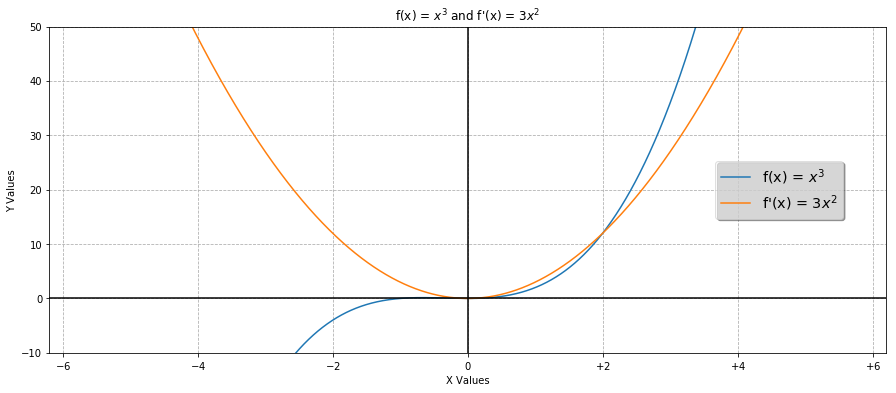

In [15]:
from matplotlib import pyplot as plt
import numpy as np

def my_func(x):
    return x**3

x_vals = np.linspace(-10, 10, 10**4)
y_vals = function(x_vals)
#calc_y_prime = lambda x: derivative(my_func, x, dx=1e-6, order=17)
#y_prime = calc_y_prime(x_vals)
y_prime = derivative(my_func, x_vals, dx=1e-6, order=17)  

fig = plt.figure(figsize=(15,6))
ax = plt.subplot()

ax.grid(linestyle='dashed')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('f(x) = $x^3$ and f\'(x) = $3x^2$')

ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_xticklabels(['$-6$', '$-4$', '$-2$', '$0$', '$+2$', '$+4$', '$+6$'])

plt.plot(x_vals, y_vals, label='f(x) = $x^3$')
plt.plot(x_vals, y_prime, label='f\'(x) = $3x^2$')
plt.xlim(-6.2, 6.2)
plt.ylim(-10, 50)

# Add x and y-axis to the plot
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
    
legend = plt.legend(loc=5, fontsize='x-large', shadow=(True), borderaxespad=3)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

### References

A Primer on Scientific Programming with Python,
5e. 
Hans Petter Langtangen